In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from fun_lib import *

In [2]:
bp = 15
m, n = 5, 10
T = 0*np.pi/180
delta = 0*np.pi/180
c_r, c_t = 5, 5
U_i = 100
dt = 0.1
alpha = 5*np.pi/180

In [3]:
X,Y,Z,PC = wing_panels(bp, T, delta, c_r, c_t, m, n)

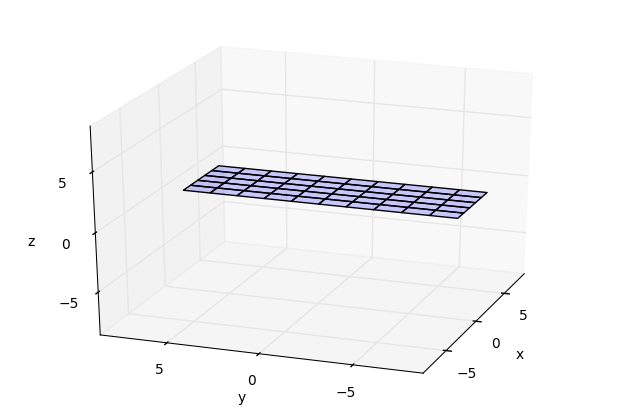

In [4]:
plot_panels(X,Y,Z);

In [5]:
XV, YV, ZV = steady_wing_vortex_panels(X,Y,Z,U_i,dt,alpha)

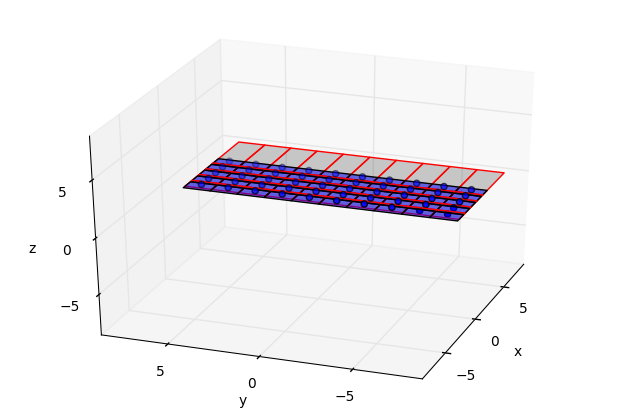

In [6]:
ax = plot_panels(X,Y,Z,transp=0.5,elev=30,azim=-160)
plot_panels(XV,YV,ZV,ax=ax,edge_color='r',fill_color=0)
plot_control_points(PC,ax);

In [7]:
foo = np.stack([X,Y,Z],axis=3)

In [8]:
foo.shape

(5, 10, 4, 3)

In [9]:
np.linalg.norm(foo,axis=3,ord=2)[2,6]

array([ 2.5       ,  3.60555128,  4.24264069,  3.35410197])

In [10]:
np.linalg.norm(foo[2,6,2,:])

4.2426406871192848

In [11]:
np.tensordot(foo,foo,axes=([3],[3])).shape

(5, 10, 4, 5, 10, 4)

In [12]:
np.matmul(foo,[1,1,1]).shape

(5, 10, 4)

In [13]:
np.matmul(foo,[1,1,1])[2,7]

array([ 5. ,  6.5,  7.5,  6. ])

In [15]:
coord_panels = np.stack([X,Y,Z],axis=3)
coord_panels.shape

(5, 10, 4, 3)

In [18]:
def biot_savart(r1,r2,G):
    cp = np.cross(r1,r2)
    cp_n = np.linalg.norm(cp,ord=2)
    u1 = r1/np.linalg.norm(r1,ord=2)
    u2 = r2/np.linalg.norm(r2,ord=2)

    return -G/(4*np.pi)*cp/(cp_n**2)*np.dot(r2 - r1,u1 - u2)

In [19]:
biot_savart(np.array([0,1,0]),np.array([1,1,0]),1)

array([ 0.        ,  0.        , -0.05626977])

In [58]:
def panel_on_pc_induced_velocity(PC,X,G=1):
    norm = lambda x: np.linalg.norm(x,ord=2,axis=1).reshape(-1,1)
    r1 = X - PC
    r2 = np.roll(r1, shift=-1, axis=0)
    
    cp = np.cross(r1,r2)
    
    d1 = r1 - r2
    d2 = r1/norm(r1) - r2/norm(r2)
    
    return (-G/(4*np.pi)*cp/(norm(cp)**2)*np.einsum('ij,ij->i', d1, d2).reshape(-1,1)).sum(axis=0)

In [59]:
panel_on_pc_induced_velocity(PC[0,0],coord_panels[0,1])

array([ 0.        ,  0.        , -0.05346937])

In [66]:
foo = coord_panels.reshape(m*n,4,3)
bar = PC.reshape(m*n,3)
loo = np.empty((m*n,m*n))
for r in range(m*n):
    for s in range(m*n):
        loo[r,s] = panel_on_pc_induced_velocity(foo[r],bar[s])[-1]

array([[  9.71161600e-01,  -5.34693717e-02,  -4.89041629e-03, ...,
         -8.26982141e-05,  -5.81845094e-05,  -4.22996428e-05],
       [ -5.34693717e-02,   9.71161600e-01,  -5.34693717e-02, ...,
         -1.22120229e-04,  -8.26982141e-05,  -5.81845094e-05],
       [ -4.89041629e-03,  -5.34693717e-02,   9.71161600e-01, ...,
         -1.88383894e-04,  -1.22120229e-04,  -8.26982141e-05],
       ..., 
       [ -8.67560367e-05,  -1.29992644e-04,  -2.04911304e-04, ...,
          9.71161600e-01,  -5.34693717e-02,  -4.89041629e-03],
       [ -6.04224058e-05,  -8.67560367e-05,  -1.29992644e-04, ...,
         -5.34693717e-02,   9.71161600e-01,  -5.34693717e-02],
       [ -4.36063660e-05,  -6.04224058e-05,  -8.67560367e-05, ...,
         -4.89041629e-03,  -5.34693717e-02,   9.71161600e-01]])